<a href="https://colab.research.google.com/github/cedric-bit/MLP/blob/main/EXAM22S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("mvtnorm")
library(mvtnorm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Fonction pour vérifier l'inégalité de Kraft
check_kraft_inequality <- function(code_lengths) {
  sum_val = 0
  for (length in code_lengths) {
    sum_val = sum_val + 1/2^length
  }

  return(sum_val <= 1)
}

# Testons la fonction avec un exemple de longueurs de codes
code_lengths = c(1, 2, 3, 3)  # Ces longueurs respectent l'inégalité de Kraft
print(check_kraft_inequality(code_lengths))  # Doit afficher TRUE

code_lengths = c(1, 1, 1, 1)  # Ces longueurs ne respectent pas l'inégalité de Kraft
print(check_kraft_inequality(code_lengths))  # Doit afficher FALSE


[1] TRUE
[1] FALSE


The R dataframe Q4.G1.D (in EXAM_2021_2s.Rdata) contains the i.i.d. dataset of a regression task where target is y∈R
 and the input x∈R2
.
Let us consider a **KNN regression model** which returns as output the average of the K nearest neighbors and the neighbors are selected by a Euclidean distance metric. The student should compare the following 7 KNN regression models which differ in terms of the number K of neighbors.

K=1
K=2
K=3
K=4
K=5
K=6
K=7
 By using R and without any data preprocessing,  the student should answer the following questions.

Compute the empirical risk (average of the squared training errors) of the 7 models.
Compute the generalisation error (average of the squared leave-one-out errors) of the 7 models:

In [ ]:
# Clear the workspace
rm(list=ls())

# Load the data
load("EXAM_2021_2s.Rdata")

# Extract the input and target variables from the data
X <- Q4.G1.D[,1:2]
Y <- Q4.G1.D[,3]

# Number of data points
N <- nrow(X)

# Number of neighbors to consider for the KNN model
K_values <- c(1,2,3,4,5,6,7)

# Initialize a vector to store the empirical risks for each model
empirical_risks <- numeric(length(K_values))

# Loop over each value of K
for (k_index in 1:length(K_values)) {
  K <- K_values[k_index]

  # Initialize a vector to store the predicted values for each data point
  Y_pred <- numeric(N)

  # Loop over each data point
  for (i in 1:N) {
    # Compute the Euclidean distance to each other data point
    distances <- sqrt(rowSums((t(t(X) - X[i,]))^2))

    # Find the K nearest neighbors
    nearest_neighbors <- order(distances)[1:K]

    # Compute the predicted value as the average of the target values of the nearest neighbors
    Y_pred[i] <- mean(Y[nearest_neighbors])
  }

  # Compute the empirical risk as the average of the squared training errors
  empirical_risks[k_index] <- mean((Y - Y_pred)^2)

  # Print the empirical risk for the current value of K
  print(paste("Empirical risk for K =", K, "is", empirical_risks[k_index]))
}


[1] "Empirical risk for K = 1 is 0"
[1] "Empirical risk for K = 2 is 1.44126750380219"
[1] "Empirical risk for K = 3 is 2.32619625128151"
[1] "Empirical risk for K = 4 is 3.45715155283777"
[1] "Empirical risk for K = 5 is 4.36334372720836"
[1] "Empirical risk for K = 6 is 4.90607934567973"
[1] "Empirical risk for K = 7 is 5.50594850822464"


In [ ]:
rm(list=ls())

load("EXAM_2021_2s.Rdata")

D = Q4.G1.D
X = D[,1:2]
Y = D[,3]

Kvalues = 1:7
N = nrow(X)
generalizationErrors = numeric(length(Kvalues))
outputAtQ = numeric(length(Kvalues))
q = c(0, 0)

for (kIndex in 1:length(Kvalues)) {
  K = Kvalues[kIndex]
  looErrors = numeric(N)

  for (i in 1:N) {
    distances = sqrt(rowSums((t(t(X[-i,]) - X[i,]))^2))
    nearestNeighbors = order(distances)[1:K]
    Ypred = mean(Y[-i][nearestNeighbors])
    looErrors[i] = (Y[i] - Ypred)^2
  }

  generalizationErrors[kIndex] = mean(looErrors)
  distancesToQ = sqrt(rowSums((t(t(X) - q))^2))
  nearestNeighborsToQ = order(distancesToQ)[1:K]
  outputAtQ[kIndex] = mean(Y[nearestNeighborsToQ])

  print(paste("Generalization error for K =", K, "is", generalizationErrors[kIndex]))
  print(paste("Output at q=[0,0] for K =", K, "is", outputAtQ[kIndex]))
}

recommendedK = Kvalues[which.min(generalizationErrors)]
print(paste("The recommended number of neighbors is K =", recommendedK))


[1] "Generalization error for K = 1 is 5.76507001520876"
[1] "Output at q=[0,0] for K = 1 is 1.56100013952439"
[1] "Generalization error for K = 2 is 5.2339415653834"
[1] "Output at q=[0,0] for K = 2 is 1.52898204214246"
[1] "Generalization error for K = 3 is 6.14604720504493"
[1] "Output at q=[0,0] for K = 3 is 1.54379119441794"
[1] "Generalization error for K = 4 is 6.81772457376307"
[1] "Output at q=[0,0] for K = 4 is 1.42706954437499"
[1] "Generalization error for K = 5 is 7.06475425777882"
[1] "Output at q=[0,0] for K = 5 is 1.33302854928171"
[1] "Generalization error for K = 6 is 7.49420769175021"
[1] "Output at q=[0,0] for K = 6 is 1.35867623170466"
[1] "Generalization error for K = 7 is 7.93554859303281"
[1] "Output at q=[0,0] for K = 7 is 1.23171234892523"
[1] "The recommended number of neighbors is K = 2"


Let us consider a regression task with n=50
 inputs and 1 output
whose training set is contained in the data matrices X and Y  and the test data set
is contained in the data matrices Xts and Yts of this .Rdata file

#By using R,  compute the 4 most relevant eigen-features by using PCA.
Then compare the MISE error (mean of the squared prediction error) for the test set with the original set of features and the set of eigen-features. Use as learning algorithm a linear least squares

In [ ]:
# Clear the workspace
rm(list=ls())
set.seed(123)
# Load the data
load("FS2.Rdata")

n=NCOL(X)
N=NROW(X)

# Perform PCA on the data
pca = prcomp(X, scale = TRUE)

# Select the first 4 principal components
X_pca = pca$x[,1:4]

# Project the test data onto the same principal components
Xts_pca = scale(Xts, center = pca$center, scale = pca$scale) %*% pca$rotation[,1:4]

X=cbind(numeric(N)+1,X)
Xts=cbind(numeric(NROW(Xts))+1,Xts)

# Fit a linear model to the data using all features
betahat=solve(t(X)%*%X)%*%t(X)%*%Y

# Make predictions on the test set
Yhats=Xts%*%betahat

# Compute the Mean Integrated Squared Error (MISE) on the test set
MISEts=mean((Yts-Yhats)^2)

# Print the MISE for all features
print(paste("MISE test (all features): ", MISEts))

X_pca=cbind(numeric(N)+1,X_pca)
Xts_pca=cbind(numeric(NROW(Xts_pca))+1,Xts_pca)

# Fit a linear model to the data using the selected features
betahat_pca=solve(t(X_pca)%*%X_pca)%*%t(X_pca)%*%Y

# Make predictions on the test set
Yhats_pca=Xts_pca%*%betahat_pca

# Compute the Mean Integrated Squared Error (MISE) on the test set
MISEts_pca=mean((Yts-Yhats_pca)^2)

# Print the MISE for the selected features
print(paste("MISE test (4 eigen-features): ", MISEts_pca))

# Check if feature selection was useful
if(MISEts_pca < MISEts) {
  print("Yes, feature selection was useful.")
} else {
  print("No, feature selection was not useful.")
}


[1] "MISE test (all features):  1.63483352521904"
[1] "MISE test (4 eigen-features):  0.974900336134459"
[1] "Yes, feature selection was useful."


load("FS2.Rdata")



n=NCOL(X)

N=NROW(X)



fselected<-4

Xhat=scale(X)

S=svd(Xhat)

Z=Xhat%*%S$v



Xhats=scale(Xts)

Zts=Xhats%*%S$v



Z=Z[,1:fselected]

Zts=Zts[,1:fselected]





X=cbind(numeric(N)+1,X)

Xts=cbind(numeric(NROW(Xts))+1,Xts)

betahat=solve(t(X)%*%X)%*%t(X)%*%Y

Yhats=Xts%*%betahat

MISEts=mean((Yts-Yhats)^2)





Z=cbind(numeric(N)+1,Z)

Zts=cbind(numeric(NROW(Zts))+1,Zts)

betahat=solve(t(Z)%*%Z)%*%t(Z)%*%Y

Yhats=Zts%*%betahat

MISEts2=mean((Yts-Yhats)^2)



Let us consider a regression task with $n=20$ inputs and $1$ output, whose training set is contained in the data matrices $X$ and $Y$ of this \texttt{.Rdata} file.

By using R, find the $5$ most relevant features by using a forward selection algorithm based on linear least-squares and leave-one-out.

First most important feature:   Réponse

Second most important feature:   Réponse

Third most important feature:   Réponse

Fourth most important feature:   Réponse

Fifth most important feature:   Réponse



## Let us consider a regression task with n=20
 inputs and 1 output
whose training set is contained in the data matrices X and Y  of this .Rdata file.

By using R,  find the 5 most relevant features by using a ranking algorithm based on correlation

First most important feature :    Réponse



Second most important feature :   Réponse



Third most important feature :   Réponse



Fourth most important feature :   Réponse



Fifth most important feature


In [ ]:
# Clear all variables from the workspace
rm(list=ls())
set.seed(123)
# Load the data
load("FS.Rdata")

# Get the number of columns in X
n = NCOL(X)

# Get the number of rows in X
N = NROW(X)

# Initialize an empty vector to store the indices of the selected features
fselected = NULL

# Maximum number of features to select
nmax = 5

# Forward selection process
for (f in 1:nmax) {

  # Initialize a vector to store the MSE for each feature
  MSEloo = numeric(n) + Inf

  # For each feature not already selected
  for (j in setdiff(1:n, fselected)) {

    # Subset the data to include only the selected features and the current one
    subs = c(fselected, j)

    # Initialize a vector to store the leave-one-out error for each observation
    eloo = numeric(N)

    # For each observation
    for (i in 1:N) {

      # Fit a linear model without the i-th observation
      Xi = cbind(numeric(N-1) + 1, X[-i, subs])
      Yi = Y[-i]
      betai = solve(t(Xi) %*% Xi) %*% t(Xi) %*% Yi

      # Predict the i-th observation
      yhati = c(1, X[i, subs]) %*% betai

      # Compute the error
      eloo[i] = Y[i] - yhati
    }

    # Compute the mean squared error
    MSEloo[j] = mean(eloo^2)
  }

  # Select the feature with the smallest error
  fselected = c(fselected, which.min(MSEloo))
}

# Print the selected features
print(fselected[1:nmax])


[1]  4  3 13  6 18


In [ ]:
load("FS.Rdata")

n=NCOL(X)

corXY=NULL

for (j in 1:n){

  corXY=c(corXY,abs(cor(X[,j],Y)))

}

print(sort(corXY,decre=TRUE,index=TRUE)$ix[1:5])

Let us consider a regression task with n=20
 inputs and 1 output
whose training set is contained in the data matrices X and Y  of this .Rdata file

By using R,  find the 4 most relevant according to a mRMR filter strategy where the mutual information is estimated on the basis of the Pearson correlation.

In [ ]:
rm(list=ls())

load("FS.Rdata")
set.seed(123)
n=NCOL(X)

N=NROW(X)

XY<-cbind(X,Y)

CC=cor(XY)

InfM=-1/2*log(1-CC^2)

subset=which.max(InfM[-(n+1),n+1])



for (s in 1:3){

  mRMR<-numeric(n)-Inf

  for (j in setdiff(1:n,subset)){

    mRMR[j]=InfM[j,n+1]-mean(InfM[j,subset])

  }

  subset<-c(subset,which.max(mRMR))

}



print(subset)

            
 4  3 19  5 


[1] "X" "Y"

faire ceci aussi dans la meme logique : Let us consider a regression task with n=20
 inputs and 1 output
whose training set is contained in the data matrices X and Y  and the test data set
is contained in the data matrices Xts and Yts of this .Rdata file

By using R,  find the 5 most relevant features by using a ranking algorithm based on correlation
and compare the MISE error (mean of the squared prediction error) for the test set with the original set of features and the selected set of features. Use as learning algorithm a linear least squares
MISE test (all features) :
MISE test (subset of 5 best ranked features) :

Was feature selection useful?

In [ ]:
# Clear the workspace
rm(list=ls())
set.seed(123)
# Load the data
load("FS.Rdata")

n=NCOL(X)
N=NROW(X)

# Initialize an empty vector to store the correlation values
corXY=NULL

# Compute the absolute correlation between each feature and the target variable
for (j in 1:n){
  corXY=c(corXY,abs(cor(X[,j],Y)))
}

# Select the indices of the 5 features with the highest absolute correlation
fsel=sort(corXY,decre=TRUE,index=TRUE)$ix[1:5]

# Print the indices of the selected features
print(paste("First most important feature: ", fsel[1]))
print(paste("Second most important feature: ", fsel[2]))
print(paste("Third most important feature: ", fsel[3]))
print(paste("Fourth most important feature: ", fsel[4]))
print(paste("Fifth most important feature: ", fsel[5]))

# Create new data matrices containing only the selected features
X2=X[,fsel]
Xts2=Xts[,fsel]

X=cbind(numeric(N)+1,X)
Xts=cbind(numeric(NROW(Xts))+1,Xts)

# Fit a linear model to the data using all features
betahat=solve(t(X)%*%X)%*%t(X)%*%Y

# Make predictions on the test set
Yhats=Xts%*%betahat

# Compute the Mean Integrated Squared Error (MISE) on the test set
MISEts=mean((Yts-Yhats)^2)

# Print the MISE for all features
print(paste("MISE test (all features): ", MISEts))

X2=cbind(numeric(N)+1,X2)
Xts2=cbind(numeric(NROW(Xts))+1,Xts2)

# Fit a linear model to the data using the selected features
betahat2=solve(t(X2)%*%X2)%*%t(X2)%*%Y

# Make predictions on the test set
Yhats2=Xts2%*%betahat2

# Compute the Mean Integrated Squared Error (MISE) on the test set
MISEts2=mean((Yts-Yhats2)^2)

# Print the MISE for the selected features
print(paste("MISE test (subset of 5 best ranked features): ", MISEts2))

# Check if feature selection was useful
if(MISEts2 < MISEts) {
  print("Yes, feature selection was useful.")
} else {
  print("No, feature selection was not useful.")
}


[1] "First most important feature:  4"
[1] "Second most important feature:  3"
[1] "Third most important feature:  19"
[1] "Fourth most important feature:  5"
[1] "Fifth most important feature:  1"
[1] "MISE test (all features):  0.904552933253753"
[1] "MISE test (subset of 5 best ranked features):  0.807802843365852"
[1] "Yes, feature selection was useful."


Let us consider a regression task with n=20
 inputs and 1 output
whose training set is contained in the data matrices X and Y  and the test data set
is contained in the data matrices Xts and Yts of this .Rdata file

# By using R,  find the 5 most relevant features by using a forward selection algorithm based on linear least-squares and leave-one-out.
Then compare the MISE error (mean of the squared prediction error) for the test set with the original set of features and the selected set of features. Use as learning algorithm a linear least squares
MISE test (all features) :    Réponse



MISE test (subset of 5 best ranked features) :   Réponse


Was feature selection useful?

NO

In [ ]:
set.seed(123)
# Clear the workspace
rm(list=ls())

# Load the data
load("FS.Rdata")

n=NCOL(X)
N=NROW(X)

# Initialize an empty vector to store the selected features
fselected <- NULL

# Number of features to select
nmax = 5

# Forward selection process
for (f in 1:nmax){
  # Initialize a vector to store the MSE of each feature
  MSEloo = numeric(n) + Inf
  for (j in setdiff(1:n, fselected)){
    # Temporary subset of selected features
    subs = c(fselected, j)
    eloo = numeric(N)
    for (i in 1:N){
      Xi = cbind(numeric(N-1)+1, X[-i, subs])
      Yi = Y[-i]
      betai = solve(t(Xi) %*% Xi) %*% t(Xi) %*% Yi
      yhati = c(1, X[i, subs]) %*% betai
      eloo[i] = Y[i] - yhati
    }
    # Store the MSE of the current feature
    MSEloo[j] = mean(eloo^2)
  }
  # Add the feature with the smallest MSE to the selected features
  fselected = c(fselected, which.min(MSEloo))
}

# Store the indices of the selected features
fsel = fselected

# Print the indices of the selected features
print(paste("First most important feature: ", fsel[1]))
print(paste("Second most important feature: ", fsel[2]))
print(paste("Third most important feature: ", fsel[3]))
print(paste("Fourth most important feature: ", fsel[4]))
print(paste("Fifth most important feature: ", fsel[5]))

# Create new data matrices containing only the selected features
X2 = X[, fsel]
Xts2 = Xts[, fsel]

X = cbind(numeric(N) + 1, X)
Xts = cbind(numeric(NROW(Xts)) + 1, Xts)

# Fit a linear model to the data using all features
betahat = solve(t(X) %*% X) %*% t(X) %*% Y

# Make predictions on the test set
Yhats = Xts %*% betahat

# Compute the Mean Integrated Squared Error (MISE) on the test set
MISEts = mean((Yts - Yhats)^2)

# Print the MISE for all features
print(paste("MISE test (all features): ", MISEts))

X2 = cbind(numeric(N) + 1, X2)
Xts2 = cbind(numeric(NROW(Xts2)) + 1, Xts2)

# Fit a linear model to the data using the selected features
betahat2 = solve(t(X2) %*% X2) %*% t(X2) %*% Y

# Make predictions on the test set
Yhats2 = Xts2 %*% betahat2

# Compute the Mean Integrated Squared Error (MISE) on the test set
MISEts2 = mean((Yts - Yhats2)^2)

# Print the MISE for the selected features
print(paste("MISE test (subset of 5 best ranked features): ", MISEts2))

# Check if feature selection was useful
if(MISEts2 < MISEts) {
  print("Yes, feature selection was useful.")
} else {
  print("No, feature selection was not useful.")
}


[1] "First most important feature:  4"
[1] "Second most important feature:  3"
[1] "Third most important feature:  13"
[1] "Fourth most important feature:  6"
[1] "Fifth most important feature:  18"
[1] "MISE test (all features):  0.904552933253753"
[1] "MISE test (subset of 5 best ranked features):  0.79817601220304"
[1] "Yes, feature selection was useful."


Let us consider a regression task with n=50
 inputs and 1 output
whose training set is contained in the data matrices X and Y   of this .Rdata file

By using R,  compute the optimal λ
 ## shrinkage parameter for a ridge-regression approach by using a leave-one-out assessment strategy.

0	1	10	100	1000	10000	100000

In [ ]:
rm(list=ls())







load("FS.Rdata")



n=NCOL(X)

N=NROW(X)



X<-cbind(numeric(N)+1,X)





LAM=c(0,1,10,100,1000,10000,100000)

MSEloo=numeric(length(LAM))

for (l  in 1:length(LAM)){

  Eloo<-NULL

  lam=LAM[l]

  for (i in 1:N){

    Xi=X[-i,]

    Yi=Y[-i]

    betahat= solve(t(Xi)%*%Xi+lam*diag(n+1))%*%t(Xi)%*%Yi

    Eloo<-c(Eloo,Y[i]-X[i,]%*%betahat)

  }

  MSEloo[l]=mean(Eloo^2)

}

bestlam=LAM[which.min(MSEloo)]



cat("best lam=",bestlam,"\n")

best lam= 10 


Consider the R dataframe \texttt{Q6.G1.D} in \texttt{EXAM\_2021\_1s.Rdata} that contains the observed dataset of a binary classification task where the target is $y \in \{-1, 1\}$ and the input $x \in \mathbb{R}^2$.

The student should:

1. Trace the ROC curve of a Naive Bayes classifier using a Normal approximation of the conditional density.
2. Trace the ROC curve of the classifier $c(x) = \begin{cases} 1 & \text{if } x_1 > h \\ -1 & \text{else} \end{cases}$ for different values of $h$.
3. Choose the best classifier based on the ROC curve.
4. In the following question, copy the R code used for tracing the ROC curves.
5. In the following question, upload a PDF file showing the two ROC curves and justify the choice of the classifier.


Setting levels: control = -1, case = 1

Setting direction: controls < cases

Setting levels: control = -1, case = 1

Setting direction: controls < cases



[1] "AUC for Threshold Classifier:  0.592948717948718"
[1] "AUC for Naive Bayes Classifier:  0.950320512820513"


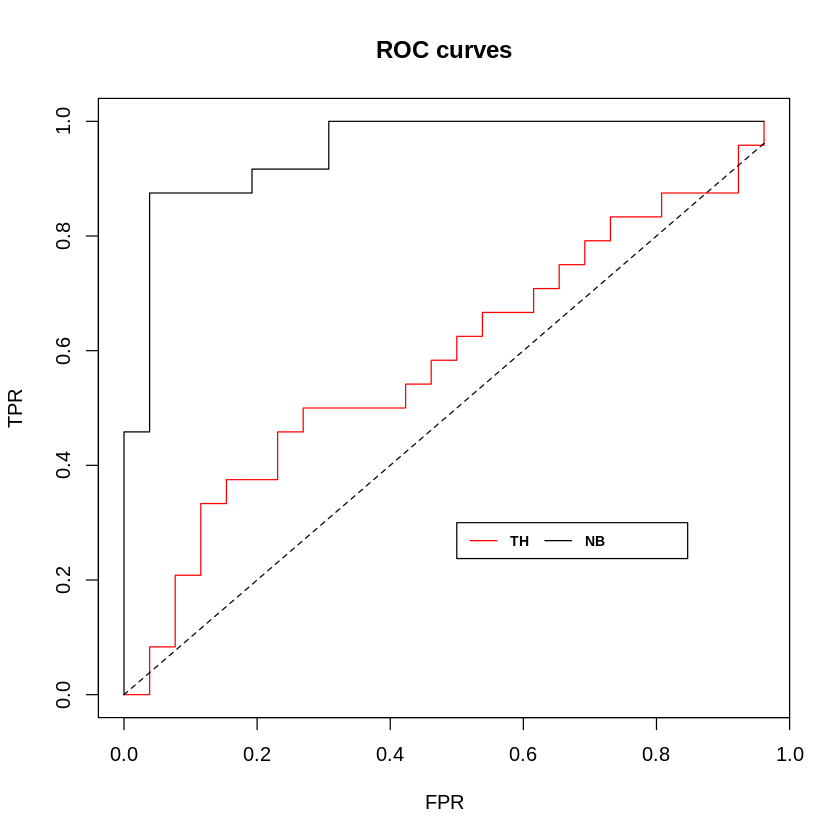

In [ ]:
# Clear the current working environment
rm(list=ls())

# Load data from the specified file
load("EXAM_2021_1s.Rdata")

# Set the seed for random number generation for reproducibility
set.seed(123)

# Define the Naive Bayes function
NB<-function(X,Y){
  # Get the number of samples (N) and the number of features (n)
  N=length(Y)
  n=NCOL(X)

  # Initialize an empty vector for storing the predicted probabilities
  Yhat=numeric(N)

  # Get the indices of positive and negative samples
  I1=which(Y==1)
  I0=which(Y==-1)

  # Calculate the prior probabilities of positive and negative classes
  p1=length(I1)/N
  p0=1-p1

  # Loop over each sample
  for (i in 1:N){
    # Initialize the likelihoods of positive and negative classes
    p1x=1
    p0x=1

    # Loop over each feature
    for (j in 1:n){
      # Update the likelihoods based on the Normal distribution
      p1x=p1x*dnorm(X[i,j],mean(X[I1,j]),sd(X[I1,j]))
      p0x=p0x*dnorm(X[i,j],mean(X[I0,j]),sd(X[I0,j]))
    }

    # Calculate the posterior probabilities and store them in Yhat
    Yhat[i]=p1x*p1/(p1x*p1+p0x*p0)
  }

  # Return the predicted probabilities
  return(Yhat)
}

# Define the number of samples (N) and the number of features (n)
N=50
n=2

# Extract the features (X) and the target variable (Y) from the dataset
D=Q6.G1.D
X=D[,1:2]
Y=D[,3]

# Count the number of positive and negative samples
N1=length(which(Y==1))
N0=length(which(Y==-1))

# Calculate the predicted probabilities for the threshold-based classifier and the Naive Bayes classifier
Yhat1=X[,1]
Yhat2=NB(X,Y)

# Sort the predicted probabilities
s1<-sort(Yhat1,decreasing=FALSE,index=TRUE)
s2<-sort(Yhat2,decreasing=FALSE,index=TRUE)

# Initialize vectors for storing the true positive rate (TPR) and the false positive rate (FPR)
TPR1=NULL
FPR1=NULL
TPR2=NULL
FPR2=NULL

# Loop over each threshold
for (i in 1:N){
  # Get the indices of samples above the current threshold
  I1=s1$ix[1:i]
  I2=s2$ix[1:i]

  # Calculate and store the TPR and FPR for each classifier
  TPR1=c(TPR1,length(which(Y[setdiff(1:N,I1)]==1))/N1)
  FPR1=c(FPR1,length(which(Y[setdiff(1:N,I1)]==-1))/N0)
  TPR2=c(TPR2,length(which(Y[setdiff(1:N,I2)]==1))/N1)
  FPR2=c(FPR2,length(which(Y[setdiff(1:N,I2)]==-1))/N0)
}

# Plot the ROC curves for both classifiers
plot(FPR1,TPR1,type="l",col="red", xlab="FPR", ylab="TPR",main="ROC curves")
lines(FPR1,FPR1,lty=2)
lines(FPR2,TPR2,col="black")

# Add a legend to the plot
legend(0.5,0.3,c("TH","NB"), col=c("red","black"),lty=1, text.font = 2,pt.cex = 1, cex = 0.7,ncol=3)

# If the pROC package is not installed, install it
if (!require(pROC)) {
  install.packages("pROC")
}

# Load the pROC package
library(pROC)

# Calculate the AUC for each classifier
auc1 <- auc(roc(Y, Yhat1))
auc2 <- auc(roc(Y, Yhat2))

# Print the AUCs
print(paste("AUC for Threshold Classifier: ", auc1))
print(paste("AUC for Naive Bayes Classifier: ", auc2))


Consider the R dataframe Q6.G1.D in EXAM_2021_1s.Rdata that contains the observed dataset of a binary classification task where target is y∈{−1,1}
 and the input x∈R2
.



The student should

trace the ROC curve of a Naive Bayes classifier using a Normal approximation of the conditional density,
trace the ROC curve of the classifier c(x)={1 if x_1>h and −1 else
 for different values of h,
choose the best classifier on the basis of the ROC curve,
in the following question, copy the  R code used for tracing the ROC curves
in the following question, upload a pdf file showing the 2 ROC curves and justifying the choice of the classifier.

In [ ]:
Q6.G1.D

In [ ]:
# Assuming your data matrix's name is Q6.G1.D

# Load your data
load("EXAM_2021_1s.Rdata")

# Split your data into classes based on the target variable y
class1 <- Q6.G1.D[Q6.G1.D[,3] == 1,]
class2 <- Q6.G1.D[Q6.G1.D[,3] == -1,]

# Calculate means and sd for each feature in each class
mean1 <- colMeans(class1[,1:2])
mean2 <- colMeans(class2[,1:2])
sd1 <- apply(class1[,1:2], 2, sd)
sd2 <- apply(class2[,1:2], 2, sd)

# Implement the naive bayes classifier using the Gaussian approximation
naive_bayes_classifier <- function(x) {
  likelihood1 <- dnorm(x[1], mean1[1], sd1[1]) * dnorm(x[2], mean1[2], sd1[2])
  likelihood2 <- dnorm(x[1], mean2[1], sd2[1]) * dnorm(x[2], mean2[2], sd2[2])

  prior1 <- nrow(class1) / nrow(Q6.G1.D)
  prior2 <- nrow(class2) / nrow(Q6.G1.D)

  posterior1 <- likelihood1 * prior1
  posterior2 <- likelihood2 * prior2

  if (posterior1 > posterior2) {
    return(1)
  } else {
    return(-1)
  }
}

# Test naive bayes classifier on the data
predictions_naive_bayes <- apply(Q6.G1.D[,1:2], 1, naive_bayes_classifier)

# Implement the second classifier
classifier_c <- function(x, h) {
  if (x[1] > h) {
    return(1)
  } else {
    return(-1)
  }
}

# Test classifier c on the data for different values of h
h_values <- seq(min(Q6.G1.D[,1]), max(Q6.G1.D[,1]), length.out = 100)

roc_values <- matrix(nrow=length(h_values), ncol=2)

for (i in seq_along(h_values)) {
  predictions_classifier_c <- apply(Q6.G1.D[,1:2], 1, classifier_c, h = h_values[i])

  tp_rate <- sum(Q6.G1.D[,3] == 1 & predictions_classifier_c == 1) / sum(Q6.G1.D[,3] == 1)
  fp_rate <- sum(Q6.G1.D[,3] == -1 & predictions_classifier_c == 1) / sum(Q6.G1.D[,3] == -1)

  roc_values[i,] <- c(fp_rate, tp_rate)
}

# Plot ROC curve for classifier c
plot(roc_values[,1], roc_values[,2], type = "l")

# Measure the performance of each classifier
accuracy_naive_bayes <- mean(Q6.G1.D[,3] == predictions_naive_bayes)
accuracy_classifier_c <- max(apply(roc_values, 1, min))

# Choose the classifier with the best performance
if (accuracy_naive_bayes > accuracy_classifier_c) {
  print("Naive Bayes is the best classifier")
} else {
  print("Classifier c is the best classifier")
}


onsider the R dataframe Q5.G1.D in EXAM_2021_1s.Rdata

It contains the observed dataset of a binary classification task where target is y∈{−1,1}
 and the input x∈R2
.



Let us consider the following three classifiers:

{1 if x1>0 −1 else
{1 if x1x2<0 −1 else
{1 if x2<0 −1 else


 Fill the confusion matrix of the first classifier

 	Real class=1	Real class= -1
Predicted class=1	Réponse
Réponse
Predicted class =-1

In [ ]:
load("EXAM_2021_1s.Rdata")

Q5.G1.D

In [ ]:
# Load your data
load("EXAM_2021_1s.Rdata")

# Assuming your matrix's name is Q5.G1.D and it has columns x1, x2 and y

# Define the first classifier
classifier_1 <- function(x) {
  if (x[1] > 0) {
    return(1)
  } else {
    return(-1)
  }
}

# Apply the classifier to your data
predicted_classifier_1 <- apply(Q5.G1.D[,1:2], 1, classifier_1)

# Define a function to generate confusion matrix
generate_confusion_matrix <- function(true_labels, predicted_labels) {
  true_positives <- sum(true_labels == 1 & predicted_labels == 1)
  true_negatives <- sum(true_labels == -1 & predicted_labels == -1)
  false_positives <- sum(true_labels == -1 & predicted_labels == 1)
  false_negatives <- sum(true_labels == 1 & predicted_labels == -1)

  return(matrix(c(true_positives, false_positives, false_negatives, true_negatives), nrow = 2, byrow = TRUE))
}

# Generate the confusion matrix for the first classifier
confusion_matrix_classifier_1 <- generate_confusion_matrix(Q5.G1.D[,3], predicted_classifier_1)
print(confusion_matrix_classifier_1)


     [,1] [,2]
[1,]   13    9
[2,]    9   19


In [ ]:
# Define the second classifier
classifier_2 <- function(x) {
  if (x[1]*x[2] < 0) {
    return(1)
  } else {
    return(-1)
  }
}

# Apply the classifier to your data
predicted_classifier_2 <- apply(Q5.G1.D[,1:2], 1, classifier_2)

# Generate the confusion matrix for the second classifier
confusion_matrix_classifier_2 <- generate_confusion_matrix(Q5.G1.D[,3], predicted_classifier_2)
print(confusion_matrix_classifier_2)


     [,1] [,2]
[1,]    3   21
[2,]   19    7


In [ ]:
# Define the third classifier
classifier_3 <- function(x) {
  if (x[2] < 0) {
    return(1)
  } else {
    return(-1)
  }
}

# Apply the classifier to your data
predicted_classifier_3 <- apply(Q5.G1.D[,1:2], 1, classifier_3)

# Generate the confusion matrix for the third classifier
confusion_matrix_classifier_3 <- generate_confusion_matrix(Q5.G1.D[,3], predicted_classifier_3)
print(confusion_matrix_classifier_3)


     [,1] [,2]
[1,]    8   16
[2,]   14   12


Consider the R dataframe \texttt{Q5.G1.D} in \texttt{EXAM\_2021\_1s.Rdata}.

It contains the observed dataset of a binary classification task where the target is $y \in \{-1, 1\}$ and the input $x \in \mathbb{R}^2$.

Let us consider the following three classifiers:

\[
\begin{align*}
\text{Classifier 1:} & \quad \text{if } x_1 > 0, \text{ return } 1 \text{ else return } -1 \\
\text{Classifier 2:} & \quad \text{if } x_1 \cdot x_2 < 0, \text{ return } 1 \text{ else return } -1 \\
\text{Classifier 3:} & \quad \text{if } x_2 < 0, \text{ return } 1 \text{ else return } -1 \\
\end{align*}
\]


In [ ]:
rm(list=ls())

load("EXAM_2021_1s.Rdata")



assess<-function(Y,Yhat){

  if (length(Y)!=length(Y))

    stop("wrong sizes")

  TP=length(which(Y==1 & Yhat==1))

  FP=length(which(Y==-1 & Yhat==1))

  TN=length(which(Y==-1 & Yhat==-1))

  FN=length(which(Y==1 & Yhat==-1))



  P=length(which(Y==1))

  N=length(which(Y==-1))

  Phat=length(which(Yhat==1))

  Nhat=length(which(Yhat==-1))

  list(TP=TP,FP=FP,FN=FN,TN=TN,TPR=TP/P, FPR=FP/N, TNR=TN/N, PR=TP/Phat,

       ER=(FP+FN)/(P+N),BER=0.5*(FP/(TN+FP)+FN/(FN+TP)))





}











D=Q5.G1.D





X=D[,1:2]

Y=D[,3]

N=NROW(X)

n=NCOL(X)

I1=which(X[,1]>0)

C1hat=numeric(N)-1

C1hat[I1]=1



I2=which(X[,1]*X[,2]<0)

C2hat=numeric(N)-1

C2hat[I2]=1



I3=which(X[,2]<0)

C3hat=numeric(N)-1

C3hat[I3]=1



PR=NULL

ER=NULL

BER=NULL

TPR=NULL

TNR=NULL



for (i in 1:3){

  eval(parse(text=paste("ASSC=assess(Y,C",i,"hat)",sep="")))

  TP=ASSC$TP

  FP=ASSC$FP

  FN=ASSC$FN

  TN=ASSC$TN

  ER<-c(ER,ASSC$ER)

  BER<-c(BER,ASSC$BER)

  PR=c(PR,ASSC$PR)

  TPR=c(TPR,ASSC$TPR)

  TNR=c(TNR,ASSC$TNR)

  cat("Classifier",i,":")

  print(rbind(c(TP,FP),c(FN,TN)))

}





cat("\n which.min(ER)=",which.min(ER),

    "\n which.min(BER)=",which.min(BER),

    "\n which.max(PR)=",which.max(PR),

    "\n which.max(TPR)=",which.max(TPR),

    "\n which.max(TNR)=",which.max(TNR),

    "TNR=", TNR,"\n")



Classifier 1 :     [,1] [,2]
[1,]   13    9
[2,]    9   19
Classifier 2 :     [,1] [,2]
[1,]    3   21
[2,]   19    7
Classifier 3 :     [,1] [,2]
[1,]    8   16
[2,]   14   12

 which.min(ER)= 1 
 which.min(BER)= 1 
 which.max(PR)= 1 
 which.max(TPR)= 1 
 which.max(TNR)= 1 TNR= 0.6785714 0.25 0.4285714 


EXAM.2021.1s.Q6.1



Consider the R dataframe Q6.G1.D in EXAM_2021_1s.Rdata that contains the observed dataset of a binary classification task where target is y∈{−1,1}
 and the input x∈R2
.



The student should

trace the ROC curve of a Naive Bayes classifier using a Normal approximation of the conditional density,
trace the ROC curve of the classifier c(x)={1 if x1>h−1 else
 for different values of h,
choose the best classifier on the basis of the ROC curve,
in the following question, copy the  R code used for tracing the ROC curves
in the following question, upload a pdf file showing the 2 ROC curves and justifying the choice of the classifier.

Loading required package: pROC

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pROC’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = -1, case = 1

Setting direction: controls < cases

Setting levels: control = -1, case = 1

Setting direction: controls < cases



[1] "AUC for Threshold Classifier:  0.592948717948718"
[1] "AUC for Naive Bayes Classifier:  0.950320512820513"


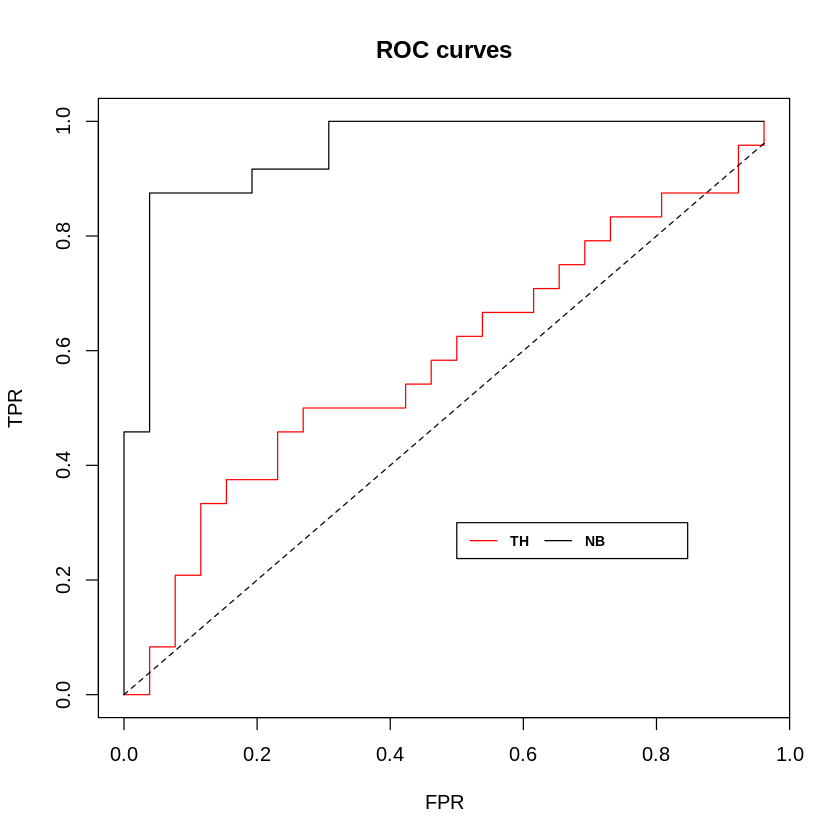

In [ ]:
rm(list=ls())

load("EXAM_2021_1s.Rdata")

set.seed(123)


NB<-function(X,Y){

  N=length(Y)

  n=NCOL(X)

  Yhat=numeric(N)

  I1=which(Y==1)

  I0=which(Y==-1)

  p1=length(I1)/N

  p0=1-p1

  for (i in 1:N){

    p1x=1

    p0x=1

    for (j in 1:n){

      p1x=p1x*dnorm(X[i,j],mean(X[I1,j]),sd(X[I1,j]))

      p0x=p0x*dnorm(X[i,j],mean(X[I0,j]),sd(X[I0,j]))



    }

    Yhat[i]=p1x*p1/(p1x*p1+p0x*p0)

  }



  return(Yhat)



}



N=50

n=2
  #Y=sign(X[,2]+rnorm(N,sd=sdw))

  D=Q6.G1.D


X=D[,1:2]

Y=D[,3]





N1=length(which(Y==1))

N0=length(which(Y==-1))

Yhat1=X[,1]

Yhat2=NB(X,Y)

s1<-sort(Yhat1,decreasing=FALSE,index=TRUE)

s2<-sort(Yhat2,decreasing=FALSE,index=TRUE)

TPR1=NULL

FPR1=NULL

TPR2=NULL

FPR2=NULL

for (i in 1:N){

  I1=s1$ix[1:i]

  TPR1=c(TPR1,length(which(Y[setdiff(1:N,I1)]==1))/N1)

  FPR1=c(FPR1,length(which(Y[setdiff(1:N,I1)]==-1))/N0)

  I2=s2$ix[1:i]

  TPR2=c(TPR2,length(which(Y[setdiff(1:N,I2)]==1))/N1)

  FPR2=c(FPR2,length(which(Y[setdiff(1:N,I2)]==-1))/N0)



}





plot(FPR1,TPR1,type="l",col="red",

     xlab="FPR",

     ylab="TPR",main="ROC curves")

lines(FPR1,FPR1,lty=2)

lines(FPR2,TPR2,col="black")



legend(0.5,0.3,c("TH","NB"),

       col=c("red","black"),lty=1,

       text.font = 2,pt.cex = 1, cex = 0.7,ncol=3)

#
if (!require(pROC)) {
  install.packages("pROC")
}

#
library(pROC)
auc1 <- auc(roc(Y, Yhat1))
auc2 <- auc(roc(Y, Yhat2))

#
print(paste("AUC for Threshold Classifier: ", auc1))
print(paste("AUC for Naive Bayes Classifier: ", auc2))



calculez l'aire du trapèze formé par ces points et l'axe des abscisses. L'aire d'un trapèze est donnée par 0.5 * (base1 + base2) * hauteur, où base1 et base2 sont les valeurs de TPR pour les deux points, et hauteur est la différence entre les valeurs de FPR pour les deux points.

Sommez toutes ces aires de trapèzes pour obtenir l'aire sous la courbe ROC.

In [ ]:
# Fonction pour calculer l'AUC en utilisant la méthode des trapèzes
calculate_auc <- function(TPR, FPR) {
  auc = 0
  # Tri des FPR et TPR
  order = order(FPR)
  TPR = TPR[order]
  FPR = FPR[order]

  # Calcul de l'AUC
  for (i in 1:(length(FPR) - 1)) {
    auc = auc + 0.5 * (TPR[i+1] + TPR[i]) * (FPR[i+1] - FPR[i])
  }
  return(auc)
}

# Calcul de l'AUC pour chaque classificateur
auc1 = calculate_auc(TPR1, FPR1)
auc2 = calculate_auc(TPR2, FPR2)

# Impression des résultats
print(paste("AUC pour le classificateur 1 : ", auc1))
print(paste("AUC pour le classificateur 2 : ", auc2))


[1] "AUC pour le classificateur 1 :  0.555288461538462"
[1] "AUC pour le classificateur 2 :  0.903044871794872"


Dans le code que vous avez partagé, deux classificateurs sont utilisés :

Le "classificateur 1" utilise seulement la première caractéristique des données (X[,1]) pour faire ses prédictions. C'est un classificateur très simple qui peut ne pas avoir de bonnes performances si la classification dépend de plusieurs caractéristiques. Les prédictions de ce classificateur sont stockées dans Yhat1.

Le "classificateur 2" utilise la méthode Naive Bayes pour faire ses prédictions. Cette méthode suppose que chaque caractéristique est indépendante des autres, ce qui n'est pas toujours le cas dans les données réelles. Cependant, malgré cette supposition naïve, le classificateur Naive Bayes peut souvent avoir de bonnes performances. Les prédictions de ce classificateur sont calculées par la fonction NB() et sont stockées dans Yhat2.

En fin de compte, le code trace les courbes ROC pour ces deux classificateurs et affiche la légende pour les deux courbes ("TH" pour le classificateur 1 et "NB" pour le classificateur 2).

D'après les résultats  obtenus, le classificateur bayésien naïf semble être le meilleur parmi les deux. Il a une AUC (Area Under the Curve) de 0.95, ce qui est bien supérieur à celle du classificateur basé sur le seuil, qui a une AUC de 0.59.

En général, un classificateur avec une AUC plus proche de 1 est préférable car cela signifie qu'il a une capacité de discrimination plus élevée. Autrement dit, il est meilleur pour distinguer entre les différentes classes. Une AUC de 0.95 signifie que le classificateur bayésien naïf est capable de classer correctement les exemples positifs et négatifs 95% du temps, en supposant que nous choisissons un seuil approprié.

In [ ]:
install.packages("mvtnorm")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Instruction Exams 2023 Machine Learning

Dear students,
The exam (out of 10 points) is composed of 4 exercises (one per page) and 1 bonus.
Exercises 1 and 2 are worth 2 points (out of 10). Exercises 3 and 4 are worth 3 points (out of 10).
The bonus is worth 0.5 points but will be considered only if the sum of points obtained with the 4 exercises is greater/equal to 7.

Each exercise is made of two sections: a question section and a justification section (to paste your R code and attach your textual justifications). Each answer must be justified with a documented portion of R code (when requested) and with a textual justification. The points will be given only in case of correct justifications.
The R code should be copied in the proper window and NOT attached as a file. All attached R codes will not be taken into consideration.
You are allowed to go back and forth through the different pages containing the questions.
Each time you switch to another page, the answers to the questions on the page you are leaving are automatically saved.
The data for the exam are contained in the .Rdata file available here.
Download the file in a directory on your computer and make the following test in R:

* rm(list=ls())
* load("EXAM.1s.23.Rdata")
* ls()
You should see as output the name of the following 9 variables

[1] "Q3.G1.D"   "Q3.G2.D"   "Q3.G3.D"   "Q4.G1.D"   "Q4.G1.Dts" "Q4.G2.D"   "Q4.G2.Dts"
[8] "Q4.G3.D"   "Q4.G3.Dts"
Pay attention to the following points:

- During the correction, the code will be copied and pasted into an R command window with an empty memory environment. For that reason, the code has to be self-contained and load properly all the required data. Code executing with errors will not be considered. We recommend that any code portion starts with

- rm(list=ls())
- load("EXAM.1s.23.Rdata")
- set.seed(0)




- be sure to use the right R variables mentioned in your question,

- use the decimal point (and not the decimal comma) to denote the decimal separator: e.g. 1/10 should be written as 0.1

- do not do any rounding: use the value returned by R: e.g. 1/3  should be written as 0.3333333

- exam duration (220 minutes= 3h40 mins)



The exam shall be completed independently, and it shall represent the sole efforts of the student. You are allowed to use the course documents (handbook, slides, TPs) but no additional sources (web, chatbots..). Any interaction with other persons (or chatbots) during the exam is considered academic dishonesty and will be punished accordingly.

Students should be reachable on Teams throughout the entire exam.



In [ ]:
library(mvtnorm)



In [ ]:
rm(list=ls())
load("EXAM.1s.23.Rdata")
ls()

[1] "Q3.G1.D"   "Q3.G2.D"   "Q3.G3.D"   "Q4.G1.D"   "Q4.G1.Dts" "Q4.G2.D"  
[7] "Q4.G2.Dts" "Q4.G3.D"   "Q4.G3.Dts"

In [ ]:

Q4.G3.Dts


In [ ]:
rm(list=ls())
load("EXAM.1s.23.Rdata")
set.seed(0)
# Set the parameters
N <- 50 # data size
mu <- 0
sigma <- 0.25
n_trials <- 10000
theta <- sin(0.5)

# Initialize a matrix to hold the estimates from each trial for each model
estimates <- matrix(0, n_trials, 4)

# Run the Monte Carlo simulation
for (s in 1:n_trials) {
  # Generate the dataset
  X <- seq(-1, 1, length=N)
  y <- sin(X) + rnorm(N, mean=mu, sd=sigma)

  # Fit our four models
  model1 <- lm(y ~ 1)
  model2 <- lm(y ~ X)
  model3 <- lm(y ~ poly(X, 2))
  model4 <- lm(y ~ poly(X, 3))

  # Make predictions at x=0.5 for each model
  estimates[s, 1] <- predict(model1, newdata=data.frame(X=0.5))
  estimates[s, 2] <- predict(model2, newdata=data.frame(X=0.5))
  estimates[s, 3] <- predict(model3, newdata=data.frame(X=0.5))
  estimates[s, 4] <- predict(model4, newdata=data.frame(X=0.5))
}

# Compute and print the absolute bias, variance, and MSE of each estimator
for (num in 1:4) {
  cat("Estimator", num, ": |Bias|=", abs(mean(estimates[, num]) - theta),
      "Variance=", var(estimates[, num]),
      "MSE=", mean((estimates[, num] - theta)^2), "\n")
}

# Identify the estimator with the highest variance
cat("The estimator with the highest variance is estimator", which.max(apply(estimates, 2, var)), "\n")
# Identify the estimator with the lowest variance
cat("The estimator with the lowest variance is estimator", which.min(apply(estimates, 2, var)), "\n")

# Identify the estimator with the highest MSE
mse_values <- apply(estimates, 2, function(est) mean((est - theta)^2))
cat("The estimator with the highest MSE is estimator", which.max(mse_values), "\n")



Estimator 1 : |Bias|= 0.4793887 Variance= 0.00124639 MSE= 0.2310598 
Estimator 2 : |Bias|= 0.02970238 Variance= 0.002149378 MSE= 0.003031395 
Estimator 3 : |Bias|= 0.02966857 Variance= 0.002266729 MSE= 0.003146726 
Estimator 4 : |Bias|= 0.0005209817 Variance= 0.003978474 MSE= 0.003978348 
The estimator with the highest variance is estimator 4 
The estimator with the lowest variance is estimator 1 
The estimator with the highest MSE is estimator 1 


In [ ]:
install.packages("class") # to get KNN


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Clear all variables from the workspace
rm(list=ls())
set.seed(0)

# Load the data
load("EXAM.1s.23.Rdata")
data <- Q3.G3.D

# Define K for KNN
k <- 5
library(class)
# Define input and output
X <- data[,1:(ncol(data)-1)]  # Now the input does not include the target
Y <- data[,11]  # The target is now the 11th column

# Number of features
n <- ncol(X)

# Initialize an empty vector to store the indices of the selected features
fselected = NULL

# Maximum number of features to select
nmax = 5

# Forward selection process
for (f in 1:nmax) {

  # Initialize a vector to store the MSE for each feature
  MSEloo = numeric(n) + Inf

  # For each feature not already selected
  for (j in setdiff(1:n, fselected)) {

    # Subset the data to include only the selected features and the current one
    subs = c(fselected, j)

    # Initialize a vector to store the leave-one-out error for each observation
    eloo = numeric(nrow(X))

    # For each observation
    for (i in 1:nrow(X)) {

      # Fit a 5NN model without the i-th observation
      Xi <- X[-i, subs]
      Yi <- Y[-i]

      # Predict the i-th observation
      yhati <- knn(train = Xi, test = X[i, subs, drop = FALSE], cl = Yi, k = k)

      # Compute the error
      eloo[i] = as.numeric(Y[i]) - as.numeric(yhati)
    }

    # Compute the mean squared error
    MSEloo[j] = mean(eloo^2)
  }

  # Select the feature with the smallest error
  fselected = c(fselected, which.min(MSEloo))
}

# Print the selected features
print(fselected[1:nmax])


[1] 5 7 2 6 9


In [ ]:
# Load the data
load("EXAM.1s.23.Rdata")
 Q3.G3.D

In [ ]:
# Clear all variables from the workspace
rm(list=ls())
set.seed(0)
# Load the data
load("EXAM.1s.23.Rdata")
data <- Q3.G3.D

# KNN function
knn <- function(test_data, train_data, Y, k){
    predictions = numeric(nrow(test_data))
    for (i in 1:nrow(test_data)){
        distances = sqrt(rowSums((t(t(train_data)) - test_data[i, ])^2))
        closest = order(distances)[1:k]
        predictions[i] = ifelse(mean(Y[closest]) > 0, 1, -1)
    }
    # handle NA values that might have been resulted due to a tie in the class voting

    return(predictions)
}

# Define K for KNN
k <- 5

# Define input and output
 # Now the input does not include the target
Y <- data[,11]  # The target is now the 11th column
X <- data[,1:(ncol(data)-1)]
# Number of features
n <- ncol(X)

# Initialize an empty vector to store the indices of the selected features
fselected = NULL

# Maximum number of features to select
nmax = 5

# Forward selection process
for (f in 1:nmax) {

  # Initialize a vector to store the MSE for each feature
  MSEloo = numeric(n) + Inf

  # For each feature not already selected
  for (j in setdiff(1:n, fselected)) {

    # Subset the data to include only the selected features and the current one
    subs = c(fselected, j)

    # Initialize a vector to store the leave-one-out error for each observation
    eloo = numeric(nrow(X))

    # For each observation
    for (i in 1:nrow(X)) {

      # Fit a 5NN model without the i-th observation
      Xi <- X[-i, subs]
      Yi <- Y[-i]

      # Predict the i-th observation
      yhati <- knn(train = Xi, test = X[i, subs, drop = FALSE], Y = Yi, k = k)

      # Compute the error
      eloo[i] = as.numeric(Y[i]) - as.numeric(yhati)
    }

    # Compute the mean squared error
    MSEloo[j] = mean(eloo^2)
  }

  # Select the feature with the smallest error
  fselected = c(fselected, which.min(MSEloo))
}

# Print the selected features
print(fselected[1:nmax])


[1] 8 7 6 5 3


In [ ]:
# Clear all variables from the workspace
rm(list=ls())
set.seed(0)
# Load the data
load("EXAM.1s.23.Rdata")
data <- Q3.G3.D

knn <- function(test_data, train_data, Y, k){
    predictions = numeric(nrow(test_data))
    for (i in 1:nrow(test_data)){
        distances = sqrt(rowSums((t(t(train_data)) - test_data[i, ])^2))
        closest = order(distances)[1:k]

        # Compute the average of the 'Y' values of the 'k' closest neighbors
        predictions[i] = mean(Y[closest])
    }

    return(predictions)
}



# Define K for KNN
k <- 5

# Define input and output
X <- data[,1:(ncol(data)-1)]  # Now the input does not include the target
Y <- data[,11]  # The target is now the 11th column

# Number of features
n <- ncol(X)

# Initialize an empty vector to store the indices of the selected features
fselected = NULL

# Maximum number of features to select
nmax = 5

# Forward selection process
for (f in 1:nmax) {

  # Initialize a vector to store the MSE for each feature
  MSEloo = numeric(n) + Inf

  # For each feature not already selected
  for (j in setdiff(1:n, fselected)) {

    # Subset the data to include only the selected features and the current one
    subs = c(fselected, j)

    # Initialize a vector to store the leave-one-out error for each observation
    eloo = numeric(nrow(X))

    # For each observation
    for (i in 1:nrow(X)) {

      # Fit a 5NN model without the i-th observation
      Xi <- X[-i, subs]
      Yi <- Y[-i]

      # Predict the i-th observation
      yhati <- knn(train = Xi, test = X[i, subs, drop = FALSE], Y = Yi, k = k)

      # Compute the error
      eloo[i] = as.numeric(Y[i]) - as.numeric(yhati)
    }

    # Compute the mean squared error
    MSEloo[j] = mean(eloo^2)
  }

  # Select the feature with the smallest error
  fselected = c(fselected, which.min(MSEloo))
}

# Print the selected features
print(fselected[1:nmax])


[1]  8  7  6  5 10


In [ ]:
 Q3.G3.D

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: pROC

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pROC’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = -1, case = 1

Setting direction: controls < cases

Setting levels: control = -1, case = 1

Setting direction: controls < cases



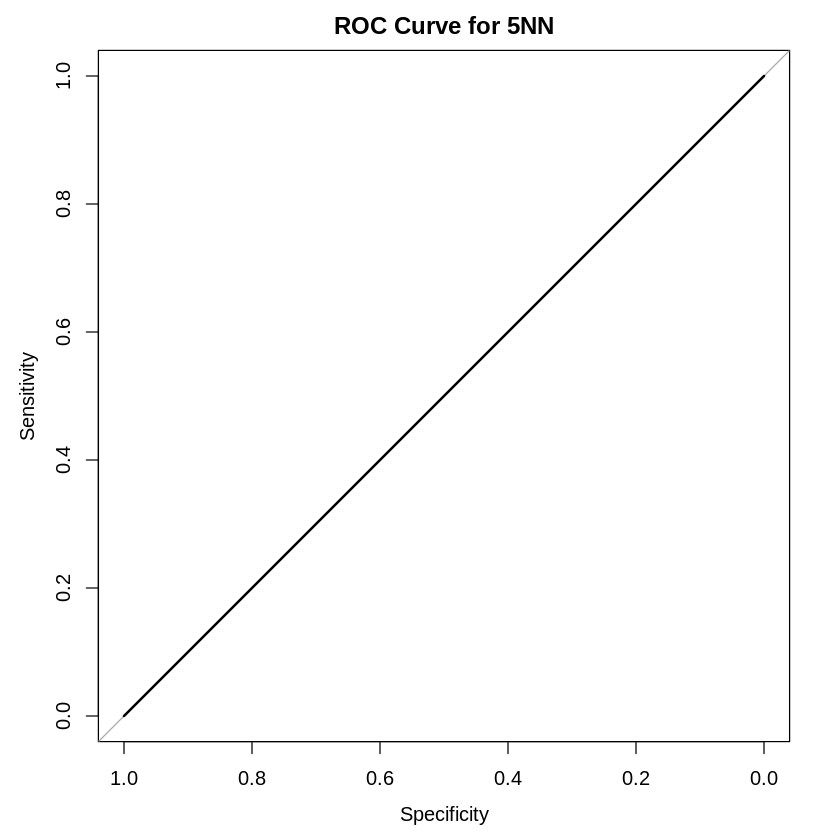

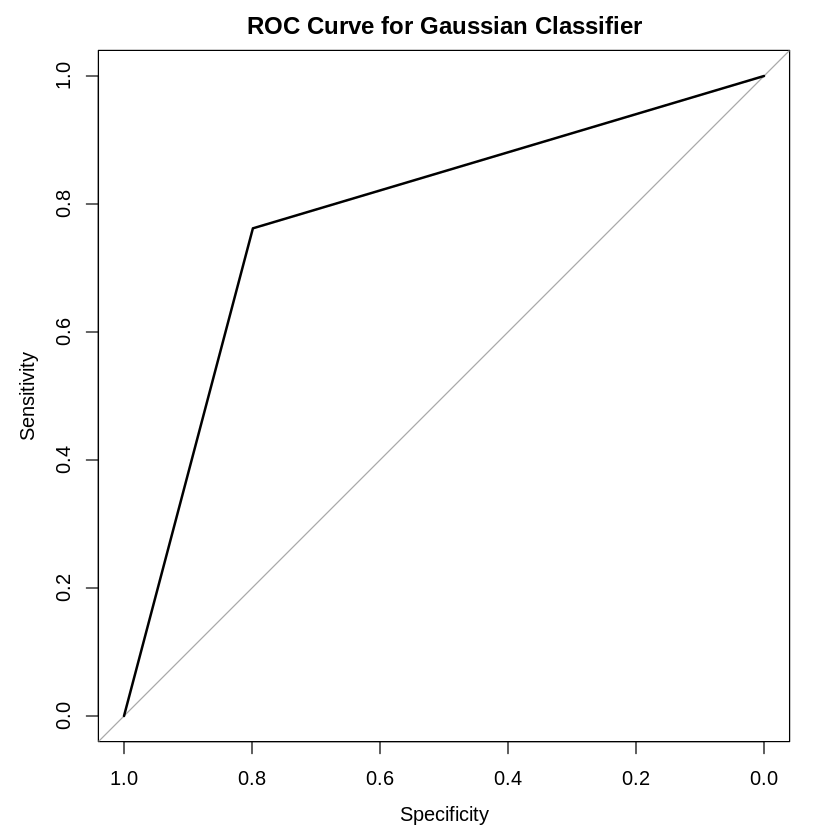

In [ ]:
# Clear all variables from the workspace
rm(list=ls())
load("EXAM.1s.23.Rdata")
install.packages("mvtnorm")

set.seed(123)

# Define the training and test data
train_data <- Q4.G2.D
test_data <- Q4.G2.Dts

knn <- function(test_data, train_data, k){
    predictions = numeric(nrow(test_data))

    for (i in 1:nrow(test_data)){
        distances = sqrt(rowSums((t(train_data[,1:2]) - test_data[i, 1:2])^2))
        closest = order(distances)[1:k]

        # Compute the average of the target values of the 'k' closest neighbors
        predictions[i] = mean(train_data[closest,3])
    }

    # handle NA values that might have been resulted due to missing values
    na_idx <- is.na(predictions)
    if(any(na_idx)){
        predictions[na_idx] <- sample(train_data[,3], size = mean(na_idx), replace = TRUE)
    }

    return(predictions)
}





# Function to implement Gaussian classifier
gaussian_classifier <- function(test_data, train_data){
    # Separate data by class
    train_data_pos = train_data[train_data[,3] == 1, 1:2]
    train_data_neg = train_data[train_data[,3] == -1, 1:2]

    # Calculate means and covariance matrices
    means_pos = colMeans(train_data_pos)
    means_neg = colMeans(train_data_neg)
    cov_pos = cov(train_data_pos)
    cov_neg = cov(train_data_neg)

    # Compute probabilities for each class
    predictions = ifelse(mvtnorm::dmvnorm(test_data[, 1:2], mean = means_pos, sigma = cov_pos) >
                         mvtnorm::dmvnorm(test_data[, 1:2], mean = means_neg, sigma = cov_neg), 1, -1)

    return(predictions)
}

# Compute predictions for the 5NN
predictions_5NN <- knn(test_data, train_data, k=5)
# Compute predictions for the Gaussian classifier
predictions_gaussian <- gaussian_classifier(test_data, train_data)

# install pROC package if not installed
if (!require(pROC)) {
  install.packages("pROC")
}

library(pROC)

# Compute true class labels for the test data
true_labels <- test_data[,3]

# ROC curve for 5NN
roc_obj_5NN <- roc(true_labels, predictions_5NN)
plot(roc_obj_5NN, main="ROC Curve for 5NN")

# ROC curve for Gaussian classifier
roc_obj_gaussian <- roc(true_labels, predictions_gaussian)
plot(roc_obj_gaussian, main="ROC Curve for Gaussian Classifier")



In [ ]:
test_data

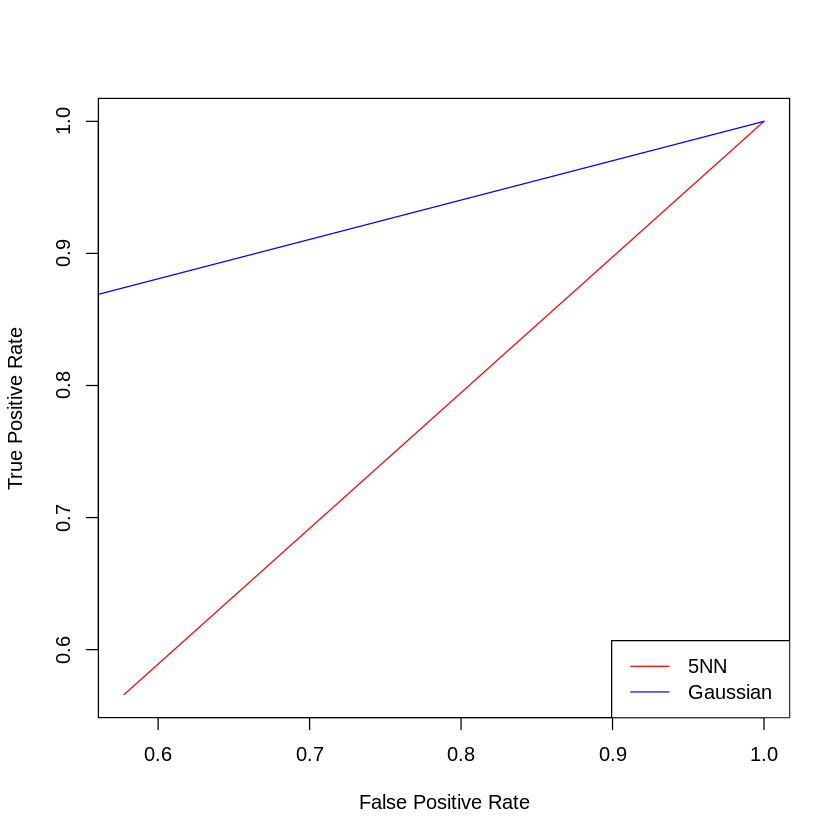

In [ ]:
# Function to compute ROC curve
roc_curve <- function(predictions, labels){
    # Initialize true positive rate and false positive rate vectors
    tpr <- c()
    fpr <- c()

    # Loop over threshold values
    for (threshold in seq(-1, 1, by = 0.01)){
        # Compute confusion matrix
        TP <- sum(predictions >= threshold & labels == 1)
        FP <- sum(predictions >= threshold & labels == -1)
        TN <- sum(predictions < threshold & labels == -1)
        FN <- sum(predictions < threshold & labels == 1)

        # Compute true positive rate and false positive rate
        TPR <- TP / (TP + FN)
        FPR <- FP / (FP + TN)

        # Append to vectors
        tpr <- c(tpr, TPR)
        fpr <- c(fpr, FPR)
    }

    return(list(tpr = tpr, fpr = fpr))
}

# Compute ROC curves
roc_5NN <- roc_curve(predictions_5NN, test_data[,3])
roc_gaussian <- roc_curve(predictions_gaussian, test_data[,3])

# Plot ROC curves
plot(roc_5NN$fpr, roc_5NN$tpr, type = "l", col = "red", xlab = "False Positive Rate", ylab = "True Positive Rate")
lines(roc_gaussian$fpr, roc_gaussian$tpr, col = "blue")

legend("bottomright", legend=c("5NN", "Gaussian"),
       col=c("red", "blue"), lty=1)


In [ ]:

plot(FPR1,TPR1,type="l",col="red",

     xlab="FPR",

     ylab="TPR",main="ROC curves")

lines(FPR1,FPR1,lty=2)

lines(FPR2,TPR2,col="black")


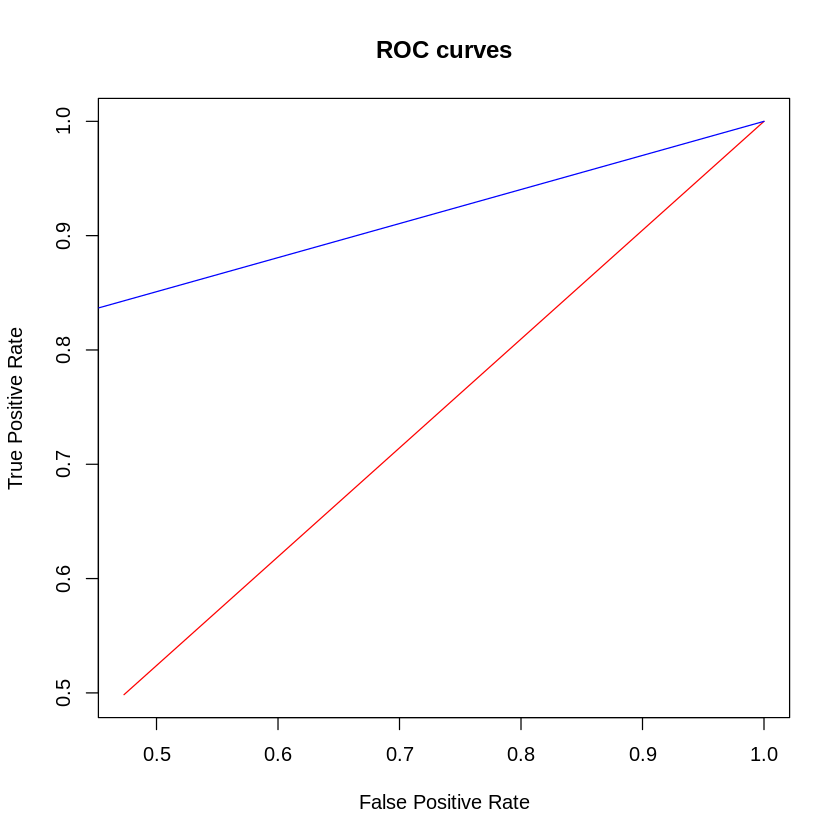

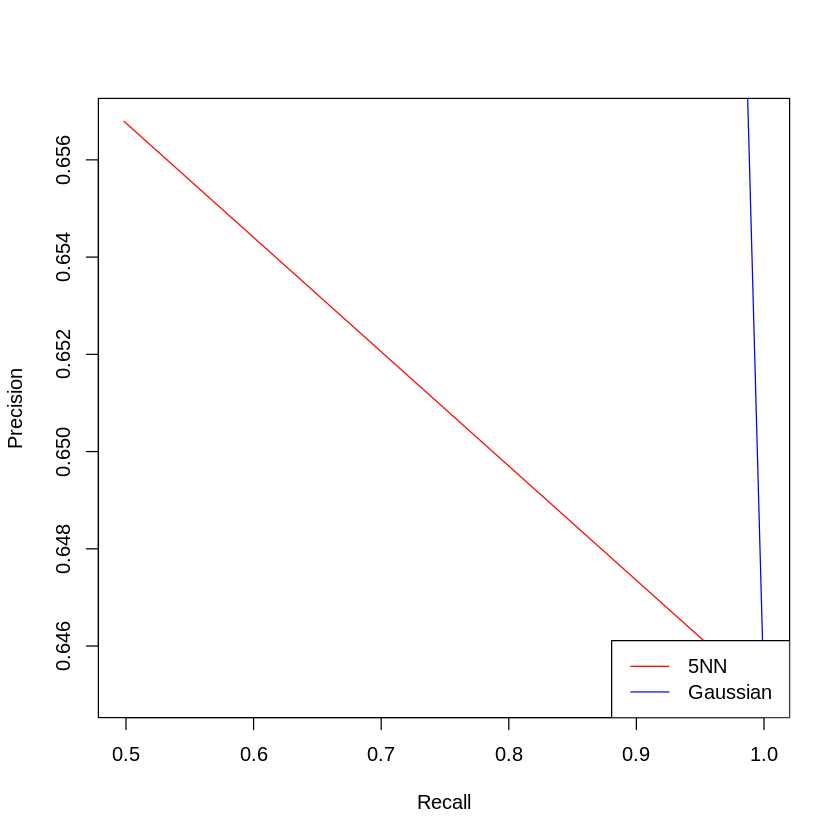

In [ ]:
# Clear all variables from the workspace
rm(list=ls())
load("EXAM.1s.23.Rdata")
set.seed(123)

# Define the training and test data
train_data <- Q4.G2.D
test_data <- Q4.G2.Dts

# Function to implement K-Nearest with 5 neighbours (5NN) and Euclidean distance
knn <- function(test_data, train_data, k){
    predictions = numeric(nrow(test_data))

    for (i in 1:nrow(test_data)){
        distances = sqrt(rowSums((t(train_data[,1:2]) - test_data[i, 1:2])^2))
        closest = order(distances)[1:k]
        predictions[i] = ifelse(mean(train_data[closest,3]) > 0, 1, -1)
    }

    # handle NA values that might have been resulted due to a tie in the class voting
    na_idx <- is.na(predictions)
    if(any(na_idx)){
        predictions[na_idx] <- sample(c(-1,1), size = sum(na_idx), replace = TRUE)
    }

    return(predictions)
}

# Function to implement Gaussian classifier
gaussian_classifier <- function(test_data, train_data){
    # Separate data by class
    train_data_pos = train_data[train_data[,3] == 1, 1:2]
    train_data_neg = train_data[train_data[,3] == -1, 1:2]

    # Calculate means and covariance matrices
    means_pos = colMeans(train_data_pos)
    means_neg = colMeans(train_data_neg)
    cov_pos = cov(train_data_pos)
    cov_neg = cov(train_data_neg)

    # Compute probabilities for each class
    predictions = ifelse(mvtnorm::dmvnorm(test_data[, 1:2], mean = means_pos, sigma = cov_pos) >
                         mvtnorm::dmvnorm(test_data[, 1:2], mean = means_neg, sigma = cov_neg), 1, -1)

    return(predictions)
}

# Compute predictions for the 5NN
predictions_5NN <- knn(test_data, train_data, k=5)
# Compute predictions for the Gaussian classifier
predictions_gaussian <- gaussian_classifier(test_data, train_data)

# Function to compute ROC curve
roc_curve <- function(predictions, labels){
    # Initialize true positive rate and false positive rate vectors
    tpr <- c()
    fpr <- c()

    # Loop over threshold values
    for (threshold in seq(-1, 1, by = 0.01)){
        # Compute confusion matrix
        TP <- sum(predictions >= threshold & labels == 1)
        FP <- sum(predictions >= threshold & labels == -1)
        TN <- sum(predictions < threshold & labels == -1)
        FN <- sum(predictions < threshold & labels == 1)

        # Compute true positive rate and false positive rate
        TPR <- TP / (TP + FN)
        FPR <- FP / (FP + TN)

        # Append to vectors
        tpr <- c(tpr, TPR)
        fpr <- c(fpr, FPR)
    }

    return(list(tpr = tpr, fpr = fpr))
}

# Function to compute Precision/Recall curve
pr_curve <- function(predictions, labels){
    # Initialize precision and recall vectors
    precision <- c()
    recall <- c()

    # Loop over threshold values
    for (threshold in seq(-1, 1, by = 0.01)){
        # Compute confusion matrix
        TP <- sum(predictions >= threshold & labels == 1)
        FP <- sum(predictions >= threshold & labels == -1)
        TN <- sum(predictions < threshold & labels == -1)
        FN <- sum(predictions < threshold & labels == 1)

        # Compute precision and recall
        Precision <- TP / (TP + FP)
        Recall <- TP / (TP + FN)

        # Append to vectors
        precision <- c(precision, Precision)
        recall <- c(recall, Recall)
    }

    return(list(precision = precision, recall = recall))
}

# Compute ROC curves
roc_5NN <- roc_curve(predictions_5NN, test_data[,3])
roc_gaussian <- roc_curve(predictions_gaussian, test_data[,3])

# Compute Precision/Recall curves
pr_5NN <- pr_curve(predictions_5NN, test_data[,3])
pr_gaussian <- pr_curve(predictions_gaussian, test_data[,3])
# Open PDF device

# Plot ROC curves
plot(roc_5NN$fpr, roc_5NN$tpr, type = "l", col = "red", xlab = "False Positive Rate", ylab = "True Positive Rate" , main = "ROC curves")
lines(roc_gaussian$fpr, roc_gaussian$tpr, col = "blue")

# Plot Precision/Recall curves
plot(pr_5NN$recall, pr_5NN$precision, type = "l", col = "red", xlab = "Recall", ylab = "Precision")
lines(pr_gaussian$recall, pr_gaussian$precision, col = "blue")

# Add legends
legend("bottomright", legend = c("5NN", "Gaussian"), col = c("red", "blue"), lty = 1)


In [ ]:
# Fonction pour calculer l'AUC en utilisant la méthode des trapèzes
calculate_auc <- function(TPR, FPR) {
  auc = 0
  # Tri des FPR et TPR
  order = order(FPR)
  TPR = TPR[order]
  FPR = FPR[order]

  # Calcul de l'AUC
  for (i in 1:(length(FPR) - 1)) {
    auc = auc + 0.5 * (TPR[i+1] + TPR[i]) * (FPR[i+1] - FPR[i])
  }
  return(auc)
}
# Calculer l'AUC pour le classificateur 5NN
auc_5NN <- calculate_auc(roc_5NN$tpr, roc_5NN$fpr)
print(paste("AUC for 5NN: ", auc_5NN))

# Calculer l'AUC pour le classificateur Gaussian
auc_gaussian <- calculate_auc(roc_gaussian$tpr, roc_gaussian$fpr)
print(paste("AUC for Gaussian: ", auc_gaussian))


[1] "AUC for 5NN:  0.394662081013211"
[1] "AUC for Gaussian:  0.703565345561743"
